In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
date = '2020-03-17'
filename = 'oteann_results_'+date+'.csv'
df_results = pd.read_csv(filename)
print(filename)

oteann_results_2020-03-17.csv


In [3]:
#df_results.drop(df_results.tail(X).index,inplace=True)
df_results.shape

(340, 39)

In [4]:
df_results.tail(10)

,date,time,lang,task,lstm,word_len_mean,pronunciation_len_mean,nb_samples,max_len_input,max_len_target,...,test_err_2_label,test_err_2_nb,test_err_2_word,test_err_2_pronunciation,test_err_2_prediction,test_err_3_label,test_err_3_nb,test_err_3_word,test_err_3_pronunciation,test_err_3_prediction
330,2020-03-19,18:36:02,nl,write,512,8.6,7.8,13344,24,26,...,w:-.d.+.t.,16,maand,maːnt,maant,w:-.+.t.,14,schrikaanjagendst,sxrɪkanjaɣəntst,schrikaanjagendstt
331,2020-03-19,18:43:36,nl,read,512,8.6,7.8,13344,25,25,...,r:-.ɛ.+.ə.,9,tsaddeks,tsɑdɛks,tsɑdəks,r:-.χ.+.x.,9,schelde,sχɛldə,sxɛldə
332,2020-03-19,18:49:16,pt,write,512,7.1,7.0,13722,20,23,...,w:-.c.+.s.,13,cinema,sinemɐ,sinema,w:-.u.+.o.,13,cru,kɾu,cro
333,2020-03-19,18:54:17,pt,read,512,7.1,7.0,13722,22,21,...,r:-.o.+.u.,26,fraco,fɾako,fɾaku,r:-.u.+.o.,22,legionário,leʒionaɾiu,leʒionaɾio
334,2020-03-19,18:58:59,ru,write,512,10.7,10.5,304525,27,26,...,w:-.а.+.о.,32,бомбанув,bəmbənʊf,бомбонув,w:-.е.+.и.,29,крупнев,krʊpnɪf,крупнив
335,2020-03-19,19:07:15,ru,read,512,10.7,10.5,304525,25,28,...,r:-.+.ɪ.,5,классика,kləsɪkə,kləsɪɪkə,r:-.+.r.,4,фиссура,fɪsʊrə,fɪsʊrrə
336,2020-03-19,19:14:52,sh,write,512,8.9,9.1,98576,24,24,...,w:-.c.+.t.,3,polumjesec,pôlumjesets,polumjeste,w:-.i.+.č.,2,podvoljčić,podʋǒʎtʃitɕ,podvoljččć
337,2020-03-19,19:22:01,sh,read,512,8.9,9.1,98576,23,25,...,r:-.â.+.ǎ.,23,davorski,dâʋorski,dǎʋorski,r:-.ǎ.+.a.,22,špatula,ʃpǎtula,ʃpatula
338,2020-03-19,19:29:19,tr,write,512,10.1,10.3,117850,27,26,...,w:-.â.+.a.,6,tekâmüle,tekamylɛ,tekamüle,w:-.i.+.r.,2,başgardiyan,baʃɡardijan,başgardryan
339,2020-03-19,19:38:39,tr,read,512,10.1,10.3,117850,25,28,...,r:-.ɫ.+.ɯ.,3,kımıldatılırsınız,kɯmɯɫdatɯɫɯrsɯnɯz,kɯmɯɫdatɯɯrɯsɯnɯz,r:-.ɫ.+.l.,3,diplomat,dɪpɫomat,dɪplomat


In [5]:
tasks  = df_results.task.unique()
tasks
nb_tasks=len(tasks)
print('nb_tasks=%d' % nb_tasks)
langs  = df_results.lang.unique()
nb_langs=len(langs)
print('nb_langs=%d' % nb_langs)

nb_episodes= df_results.shape[0]/(nb_langs*nb_tasks)
print('nb_episodes=%d' % nb_episodes)

nb_tasks=2
nb_langs=17
nb_episodes=10


In [6]:
df_results.columns

Index(['date', 'time', 'lang', 'task', 'lstm', 'word_len_mean',
       'pronunciation_len_mean', 'nb_samples', 'max_len_input',
       'max_len_target', 'nb_input_symbols', 'nb_output_symbols', 'x_symbols',
       'y_symbols', 'x_nb_symbols', 'y_nb_symbols', 'trainable_params',
       'training_duration', 'val_accuracy', 'nb_predictions',
       'nb_good_predictions', 'test_err_index', 'test_accuracy',
       'test_duration', 'test_err_1_label', 'test_err_1_nb', 'test_err_1_word',
       'test_err_1_pronunciation', 'test_err_1_prediction', 'test_err_2_label',
       'test_err_2_nb', 'test_err_2_word', 'test_err_2_pronunciation',
       'test_err_2_prediction', 'test_err_3_label', 'test_err_3_nb',
       'test_err_3_word', 'test_err_3_pronunciation', 'test_err_3_prediction'],
      dtype='object')

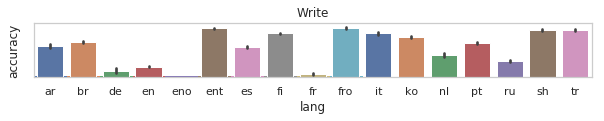

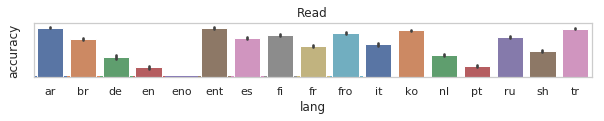

In [7]:
def display_results(df):
    sns.set(style="whitegrid")
    current_palette = sns.color_palette()
    
    # rescale accuracy for better reading once displayed
    df['accuracy'] = df['test_accuracy'] * 100
    
    for task in tasks:
        df_o = df[df.task==task].sort_values(by='lang')
        df_o = df_o[['task', 'lang', 'accuracy']]
        
        #df_o = df_o.groupby('lang', as_index=False).mean()
        sns.palplot(current_palette)
        ax = sns.barplot(x="lang", y="accuracy", data=df_o, ci='sd', palette=current_palette)
    
        # add the accuracy number on the top of each bar
        i=0
        for index, row in df_o.iterrows():
            if index >= (nb_langs*nb_tasks):
                break
            accuracy_mean = df[df.lang==row.lang][df.task==task].accuracy.mean()
            accuracy_mean = int(round(accuracy_mean))
            ax.text(i, row.accuracy+10, str(round(accuracy_mean)), color='black', ha="center")
            i+=1
        plt.title(task.capitalize())
        plt.ylim(0, 100)
        plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
        
display_results(df_results)

In [8]:
nb_tasks = len(df_results.task.unique())
nb_langs = len(df_results.lang.unique())

In [9]:
def display_history(df):
    for i, row in df.iterrows():
        print('test:%d, LANG=%s' % (i, row.lang))
        for column in df.columns:
            print('%s:%s' % (column, str(row[column])))
        print('=================================================')
#display_history(df_results.head(nb_tasks*nb_langs))

In [10]:
# Calculate min, mean, max
df_dew = df_results[df_results.lang=='de'][df_results.task=='write']
df_dew.accuracy

/home/xavier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


8       5.0
42     15.0
76     14.0
110    11.0
144    19.0
178     6.0
212    10.0
246    16.0
280     9.0
314    18.0
Name: accuracy, dtype: float64

In [11]:
# Calculate min, mean, max
df = df_results
df['test_accuracy_100']=df['test_accuracy']*100
for task in df['task'].unique(): 
    df_i = df[df['task'] == task]    
    df_i = df_i[['lang','test_accuracy_100']]
    print(df_i.groupby('lang').agg({'test_accuracy_100': ['min', 'mean', 'max', 'count', 'std']}))


     test_accuracy_100                            
                   min  mean   max count       std
lang                                              
ar                50.0  57.7  62.0    10  3.128720
br                62.0  64.9  68.0    10  1.969207
de                 5.0  12.3  19.0    10  4.854551
en                18.0  19.8  22.0    10  1.316561
eno                0.0   0.0   0.0    10  0.000000
ent               89.0  89.9  92.0    10  0.875595
es                53.0  56.1  59.0    10  1.791957
fi                79.0  80.9  83.0    10  1.197219
fr                 2.0   5.7   9.0    10  1.946507
fro               88.0  90.5  93.0    10  1.581139
it                76.0  81.4  86.0    10  2.836273
ko                72.0  74.1  76.0    10  1.286684
nl                36.0  41.3  46.0    10  3.335000
pt                59.0  63.0  66.0    10  2.624669
ru                27.0  29.4  33.0    10  2.118700
sh                84.0  87.8  90.0    10  1.873796
tr                83.0  87.0  9

Text(0.5, 1.0, 'Write')

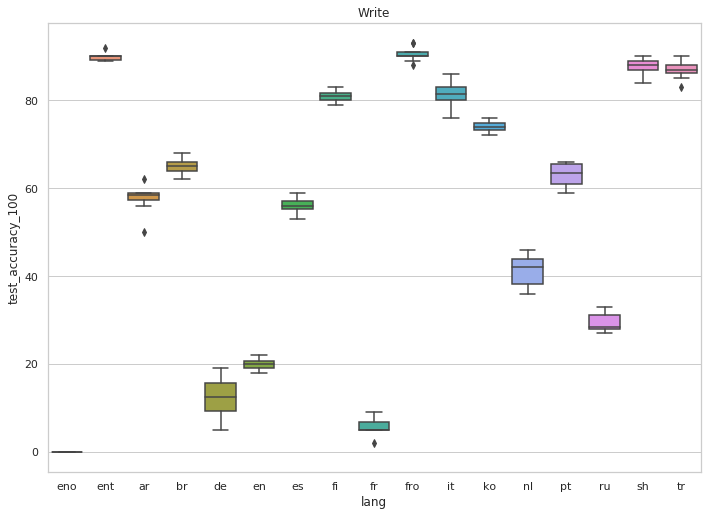

In [12]:
ax = sns.boxplot(x='lang', y='test_accuracy_100', data=df[df.task=='write'])
ax.set_title('Write')

Text(0.5, 1.0, 'Read')

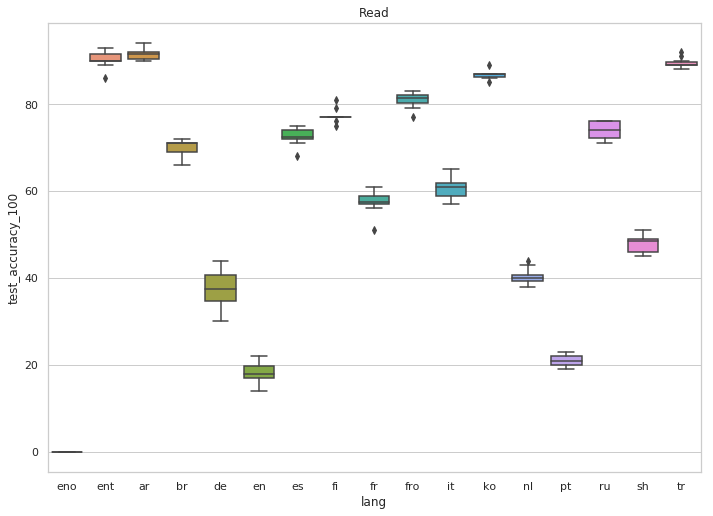

In [13]:
ax = sns.boxplot(x='lang', y='test_accuracy_100', data=df[df.task=='read'])
ax.set_title('Read')